In [1]:
from datetime import datetime
import backtrader as bt
import argparse
import backtrader as bt
import backtrader.feeds as btfeeds
import pandas
import requests
import pandas as pd
from __future__ import (absolute_import, division, print_function,
                        unicode_literals)
from io import StringIO
import pandas as pd
import numpy as np

from datetime import date, datetime, timedelta
import time
import os
from dateutil import parser

In [2]:
class SmaCross(bt.SignalStrategy):
    def __init__(self):
        sma1, sma2 = bt.ind.SMA(period=10), bt.ind.SMA(period=30)
        crossover = bt.ind.CrossOver(sma1, sma2)
        self.signal_add(bt.SIGNAL_LONG, crossover)

cerebro = bt.Cerebro()
cerebro.addstrategy(SmaCross)

0

In [4]:
asset = "AAPL"
DIR = r'/home/guest144/backtrader-master/'
target_dir = os.path.join(DIR, 'datas/polygonio')
datapath = os.path.join(target_dir, asset + '.csv')
df = pd.read_csv(datapath)


In [5]:
df = pd.read_csv(datapath, delimiter=",", index_col="datetime", parse_dates= True)
df.index = pd.to_datetime(df.index,format="%Y-%m-%d",utc=True)
df.index = df.index.tz_convert('US/Central')

In [6]:
df


,open,high,low,close,volume
datetime,,,,,
2020-11-03 03:00:00-06:00,109.54,109.59,109.54,109.59,1368.0
2020-11-03 03:01:00-06:00,109.71,109.90,109.71,109.77,4237.0
2020-11-03 03:02:00-06:00,109.71,109.74,109.68,109.68,3065.0
2020-11-03 03:04:00-06:00,109.61,109.80,109.61,109.62,1579.0
2020-11-03 03:05:00-06:00,109.62,109.62,109.62,109.62,407.0
...,...,...,...,...,...
2022-10-31 18:53:00-05:00,153.45,153.45,153.45,153.45,570.0
2022-10-31 18:55:00-05:00,153.45,153.46,153.43,153.46,1236.0
2022-10-31 18:56:00-05:00,153.46,153.46,153.45,153.46,955.0


In [7]:
data = bt.feeds.PandasData(dataname=df)

cerebro.adddata(data)
cerebro.run()

<IPython.core.display.Javascript object>


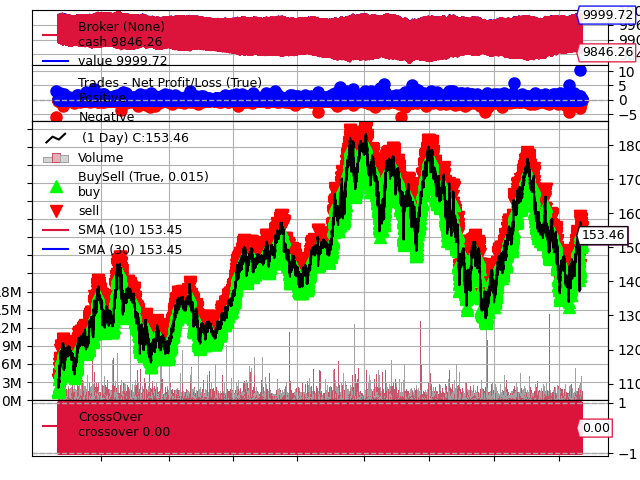

[[<Figure size 640x480 with 5 Axes>]]

In [8]:
cerebro.plot()